# Домашнє завдання №2
# Частина перша: Знайомство з Pandas.

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Вивести перші рядки таблиці за допомогою методу head:

In [2]:
data = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8",
                   decimal=",")
df = data[12]
print(df)

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126    —    —
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82    —
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51    —
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

## Визначити кількість рядків та стовпців у датафреймі (атрибут shape):

In [3]:
print(df.shape)

(28, 9)


## Замінити у таблиці значення "—" на значення NaN

In [4]:
df.replace("—", pd.NA, inplace=True)
print(df)

               Регіон   1950   1960   1970  1990  2000  2012  2014  2019
0                Крим  230.0  206.0  160.0   130    73   126  <NA>  <NA>
1           Вінницька  224.0  192.0  142.0   124    84   112   109    76
2           Волинська  247.0  250.0  179.0   153   112   148   141   101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112   111    71
4            Донецька  271.0  214.0  140.0   109    61    98    82  <NA>
5         Житомирська  261.0  223.0  159.0   129    89   122   120    79
6        Закарпатська  314.0  273.0  207.0   168   115   151   146   104
7          Запорізька  219.0  197.0  150.0   124    71   106   106    68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124   122    88
9            Київська  204.0  189.0  156.0   123    73   122   121    80
10     Кіровоградська  216.0  171.0  145.0   126    79   110   108    68
11          Луганська  262.0  235.0  144.0   116    62    96    51  <NA>
12          Львівська  234.0  240.0  171.0   140   

## Визначити типи всіх стовпців за допомогою dataframe.dtypes:

In [5]:
print("Data types:\n", df.dtypes)

Data types:
 Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


## Замінити типи нечислових колонок на числові:

In [8]:
df = df.apply(pd.to_numeric, errors='ignore')
df['1990'] = df['1990'].astype(float)
df['2000'] = df['2000'].astype(float)
df['2012'] = df['2012'].astype(float)
print("Data types:\n", df.dtypes)

Data types:
 Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


## Порахувати, яка частка пропусків міститься в кожній колонці:

In [9]:
print("Missing values:\n", df.isnull().sum() / len(df))

Missing values:
 Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


## Видалити з таблиці дані по всій країні, останній рядок таблиці:

In [10]:
df = df.drop(index=df.index[-1])
print(df)

               Регіон   1950   1960   1970   1990   2000   2012   2014   2019
0                Крим  230.0  206.0  160.0  130.0   73.0  126.0    NaN    NaN
1           Вінницька  224.0  192.0  142.0  124.0   84.0  112.0  109.0   76.0
2           Волинська  247.0  250.0  179.0  153.0  112.0  148.0  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0  123.0   71.0  112.0  111.0   71.0
4            Донецька  271.0  214.0  140.0  109.0   61.0   98.0   82.0    NaN
5         Житомирська  261.0  223.0  159.0  129.0   89.0  122.0  120.0   79.0
6        Закарпатська  314.0  273.0  207.0  168.0  115.0  151.0  146.0  104.0
7          Запорізька  219.0  197.0  150.0  124.0   71.0  106.0  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0  155.0  103.0  124.0  122.0   88.0
9            Київська  204.0  189.0  156.0  123.0   73.0  122.0  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0  126.0   79.0  110.0  108.0   68.0
11          Луганська  262.0  235.0  144.0  116.0   62.0   96.0 

## Замінити відсутні дані в стовпцях середніми значеннями цих стовпців:

In [11]:
column_names_list = df.columns.tolist()
print(column_names_list)

['Регіон', '1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']


In [12]:
for year in range(1,len(column_names_list)):
    df[column_names_list[year]].fillna(round(df[column_names_list[year]].mean(), 2), inplace=True)
print(df)

               Регіон    1950    1960   1970   1990   2000   2012    2014  \
0                Крим  230.00  206.00  160.0  130.0   73.0  126.0  111.44   
1           Вінницька  224.00  192.00  142.0  124.0   84.0  112.0  109.00   
2           Волинська  247.00  250.00  179.0  153.0  112.0  148.0  141.00   
3    Дніпропетровська  204.00  204.00  151.0  123.0   71.0  112.0  111.00   
4            Донецька  271.00  214.00  140.0  109.0   61.0   98.0   82.00   
5         Житомирська  261.00  223.00  159.0  129.0   89.0  122.0  120.00   
6        Закарпатська  314.00  273.00  207.0  168.0  115.0  151.0  146.00   
7          Запорізька  219.00  197.00  150.0  124.0   71.0  106.0  106.00   
8   Івано-Франківська  243.00  248.00  182.0  155.0  103.0  124.0  122.00   
9            Київська  204.00  189.00  156.0  123.0   73.0  122.0  121.00   
10     Кіровоградська  216.00  171.00  145.0  126.0   79.0  110.0  108.00   
11          Луганська  262.00  235.00  144.0  116.0   62.0   96.0   51.00   

## Приведення даних до правильного вираження коефіцієнту народжуваності

In [15]:
columns_list = df.columns
for column in columns_list[1:]:
    df[column] = round(df[column] / 10, 1)

print(df)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6  11.1   8.0
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   8.0
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   8.0
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

## Отримати список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні:

In [16]:
regions_above_average = df[df['2019'] > df['2019'].mean()]
print(regions_above_average['Регіон'])

2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


## У якому регіоні була найвища народжуваність у 2014 році?

In [17]:
max_birth_rate_2014_region = df.loc[df['2014'].idxmax(), 'Регіон']
print(f"{max_birth_rate_2014_region} область")

Рівненська область


## Побудувати стовпчикову діаграму народжуваності по регіонах у 2019 році:

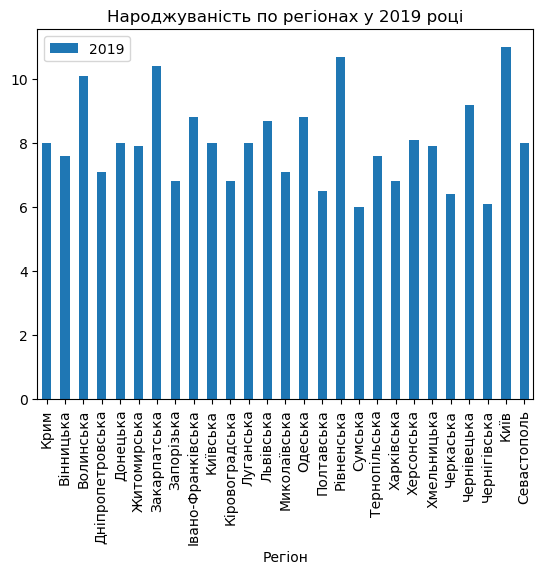

In [18]:
df.plot(x='Регіон', y='2019', kind='bar', title='Народжуваність по регіонах у 2019 році')
plt.show()

## Лінійний графік порівняння народжуваності в регіонах протягом років

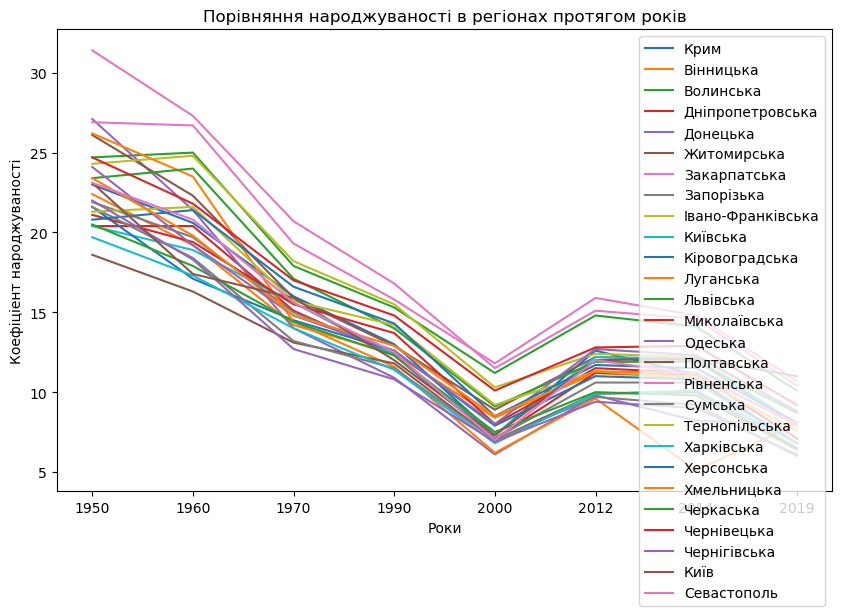

In [19]:
plt.figure(figsize=(10, 6))
for index, row in df.iterrows():
    plt.plot(df.columns[1:], row[1:], label=row['Регіон'])

plt.title('Порівняння народжуваності в регіонах протягом років')
plt.xlabel('Роки')
plt.ylabel('Коефіціент народжуваності')
plt.legend()
plt.show()

## Теплова карта розподілу народжуваності

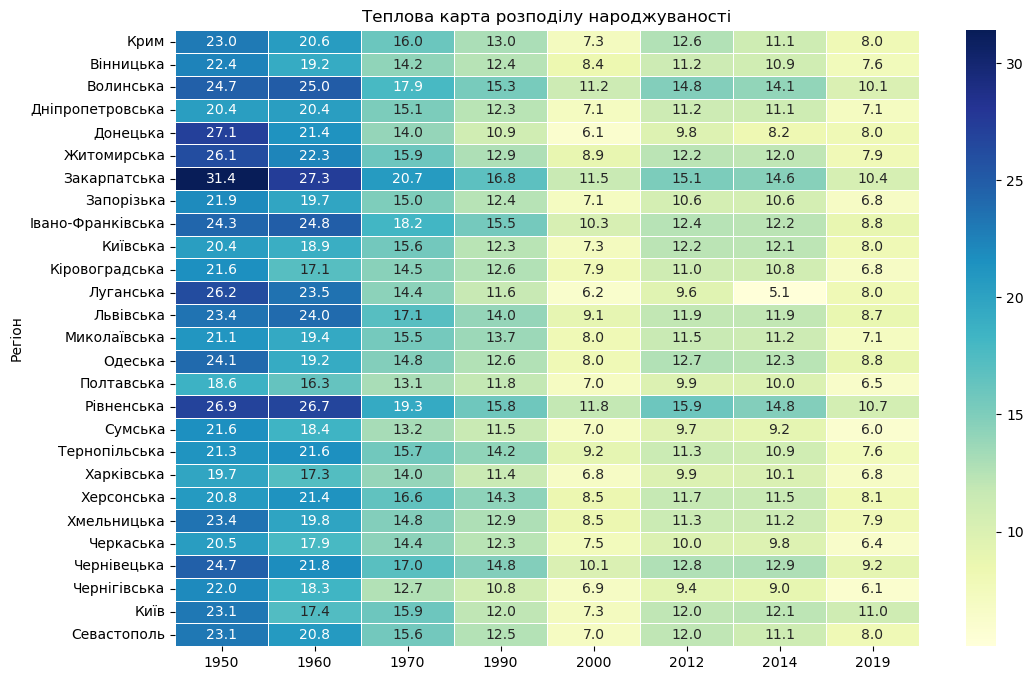

In [27]:
heatmap_data = df.set_index('Регіон').astype(float)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Теплова карта розподілу народжуваності')
plt.show()

## Розподіл коефіцієнта народжуваності за роками

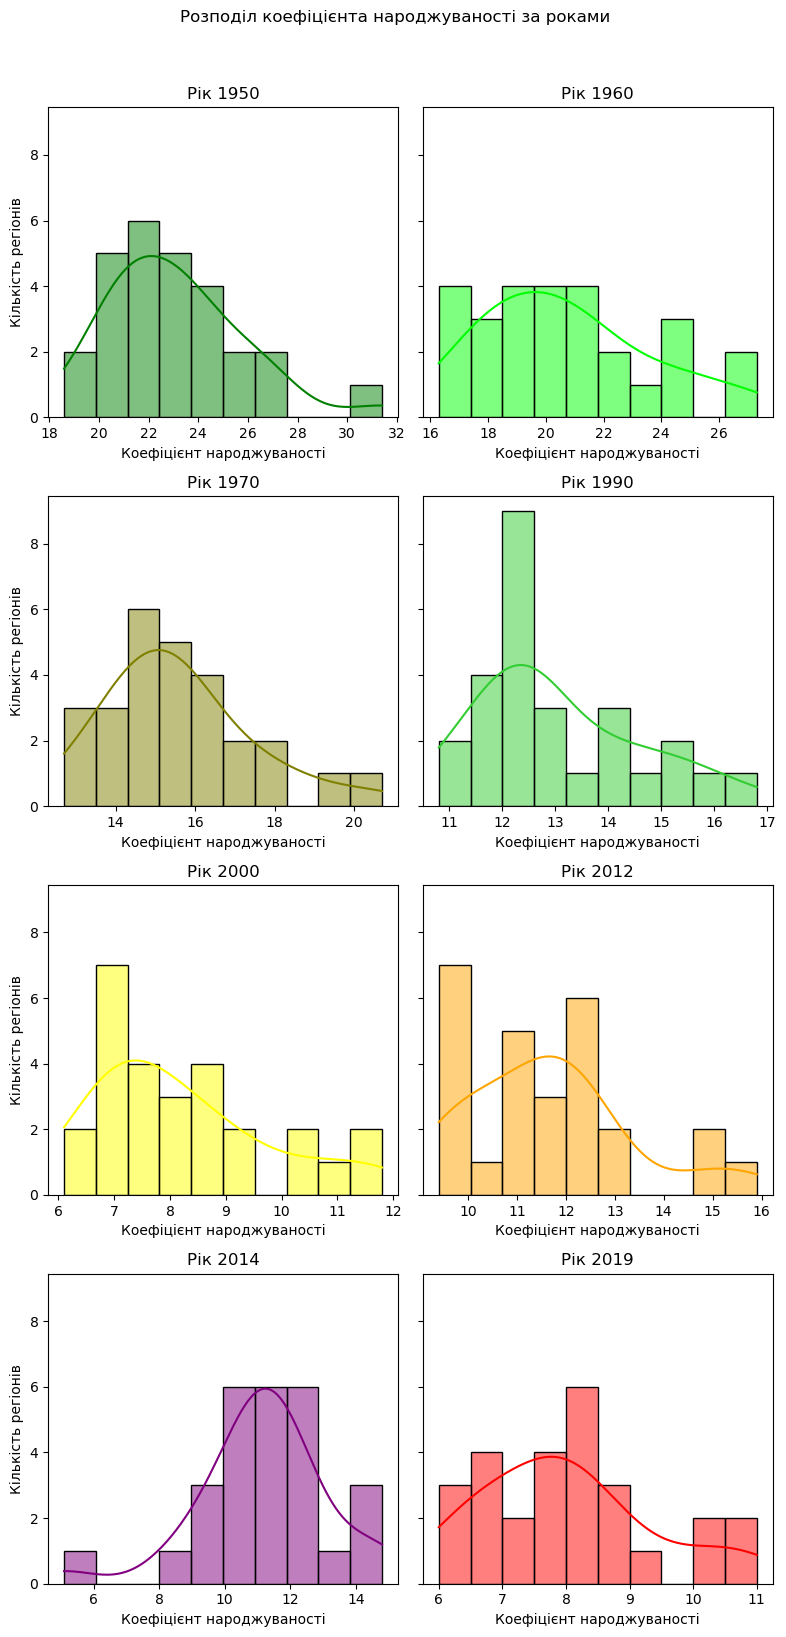

In [45]:
colors = ['green', 'lime', 'olive', 'limegreen', 'yellow', 'orange', 'purple', 'red']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 16), sharey=True)
j=0

for i, (year, ax) in enumerate(zip(df.columns[1:], axes.flatten())):
    sns.histplot(df, x=year, bins=10, kde=True, ax=ax, color=colors[j])
    ax.set_title(f'Рік {year}')
    ax.set_xlabel('Коефіцієнт народжуваності')
    ax.set_ylabel('Кількість регіонів')
    j += 1

plt.suptitle('Розподіл коефіцієнта народжуваності за роками', y=1.02)

plt.tight_layout()
plt.show()